# ERA5 


ERA5 products can be downloaded from https://cds.climate.copernicus.eu/#!/home by using the download method of the corresponding product object. For this example we will have a look at the surface temperature of the ERA5 product on single levels at monthly resolution. 

## Download

In [5]:
from datetime import datetime
from pansat.products.reanalysis.era5 import ERA5Product

t_0 = datetime(2019, 8, 1, 0)
t_1 = datetime(2019, 9, 1, 0)

# create product instance 
global_srfc_temps = ERA5Product('monthly','surface', ['2m_temperature'])

In [6]:
files = global_srfc_temps.download(t_0, t_1)

2020-10-31 19:31:05,657 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means


Creating file:  url: https://cds.climate.copernicus.eu/api/v2
key: 63394:602acfdf-3bd4-43d5-9e0e-50fe7dc26ed2



2020-10-31 19:31:05,891 INFO Request is queued
2020-10-31 19:31:06,938 INFO Request is running
2020-10-31 19:31:08,482 INFO Request is completed
2020-10-31 19:31:08,483 INFO Downloading http://136.156.133.36/cache-compute-0010/cache/data3/adaptor.mars.internal-1604169066.2189581-6265-30-dfdde04c-de04-4d51-99a7-7b5555645125.nc to ERA5/reanalysis-era5-single-levels-monthly-means/reanalysis-era5-single-levels-monthly-means_201908_2m_temperature.nc (2M)
2020-10-31 19:31:09,002 INFO Download rate 3.8M/s   


file downloaded and saved as ERA5/reanalysis-era5-single-levels-monthly-means/reanalysis-era5-single-levels-monthly-means_201908_2m_temperature.nc


The variable *files* now contains the downloaded files. Now we can open the data of a given file by calling the *ERA5Product.open()* method. This will return an xarray dataset object, which is easy to handle. 

In [7]:
temp_data = global_srfc_temps.open(filename = files[0])

# display xarray dataset object with its dimensions, coordinates, variables and attributes:
display(temp_data)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-08-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-31 18:31:06 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [8]:
# get data points as numpy arrays 
temps = temp_data.t2m[0].values
lons = temp_data.longitude.values
lats = temp_data.latitude.values 

In [10]:
# get date of file 
global_srfc_temps.filename_to_date(files[0])

datetime.datetime(2019, 8, 1, 0, 0)

## Plot data

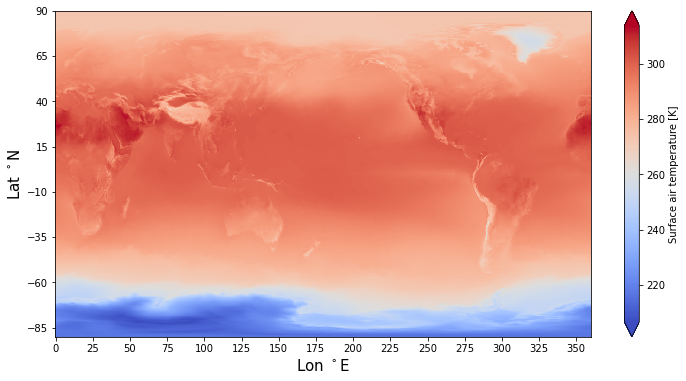

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
fontsize= 15
plt.pcolormesh(lons, lats, temps, shading = 'auto', cmap = 'coolwarm')
plt.colorbar(label="Surface air temperature [K]", extend = 'both')
plt.xticks(lons[::100])
plt.yticks(lats[::100])
plt.xlabel('Lon $^\circ$E', fontsize= fontsize)
plt.ylabel('Lat $^\circ$N', fontsize= fontsize);
